In [364]:
import pandas as pd
import seaborn as sn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,MinMaxScaler
from keras.models import Sequential 
from keras.layers import Dense 
from keras.layers import LSTM 
from sklearn.metrics import mean_squared_error

In [365]:
from matplotlib import pyplot
import numpy as np

In [366]:
df=pd.read_csv("weatherHistory.csv")

In [367]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
Formatted Date              96453 non-null object
Summary                     96453 non-null object
Precip Type                 95936 non-null object
Temperature (C)             96453 non-null float64
Apparent Temperature (C)    96453 non-null float64
Humidity                    96453 non-null float64
Wind Speed (km/h)           96453 non-null float64
Wind Bearing (degrees)      96453 non-null int64
Visibility (km)             96453 non-null float64
Loud Cover                  96453 non-null int64
Pressure (millibars)        96453 non-null float64
Daily Summary               96453 non-null object
dtypes: float64(6), int64(2), object(4)
memory usage: 8.8+ MB


In [368]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [369]:
df=df.drop(['Daily Summary'],axis=1)

In [370]:
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
dtype: int64

In [371]:
df.rename(columns={'Precip Type':'PrecipType'},inplace=True)

In [372]:
df.PrecipType[df.PrecipType == 'rain'] = 0
df.PrecipType[df.PrecipType == 'snow'] = 1

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [373]:
df.isnull().sum()

Formatted Date                0
Summary                       0
PrecipType                  517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
dtype: int64

In [374]:
df.head()

,Formatted Date,Summary,PrecipType,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,0,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,0,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,0,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,0,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,0,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51


In [375]:
df.fillna(0,inplace=True)

In [376]:
df.isnull().sum()

Formatted Date              0
Summary                     0
PrecipType                  0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
dtype: int64

In [377]:
df.rename(columns={"Temperature (C)":"Temperature","Wind Speed (km/h)":"WindSpeed","Wind Bearing (degrees)":"WindBearings","Visibility (km)":"Visibilty","Loud Cover":"LoudCover","Pressure (millibars)":"Pressure","Apparent Temperature (C)":"ApparentTemperature"},inplace=True)

In [378]:
df.head()

,Formatted Date,Summary,PrecipType,Temperature,ApparentTemperature,Humidity,WindSpeed,WindBearings,Visibilty,LoudCover,Pressure
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,0,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,0,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,0,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,0,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,0,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51


In [379]:
df.Summary.unique()

array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy',
       'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy',
       'Breezy and Overcast', 'Humid and Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy',
       'Dangerously Windy and Partly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast', 'Light Rain', 'Drizzle', 'Windy and Dry',
       'Dry and Mostly Cloudy', 'Breezy and Dry', 'Rain'], dtype=object)

In [380]:
df.LoudCover.unique()

array([0], dtype=int64)

In [381]:
df.corr()

,PrecipType,Temperature,ApparentTemperature,Humidity,WindSpeed,WindBearings,Visibilty,LoudCover,Pressure
PrecipType,1.000000,-0.562620,-0.565207,0.232113,-0.067928,-0.041984,-0.312875,NaN,0.009008
Temperature,-0.562620,1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,NaN,-0.005447
ApparentTemperature,-0.565207,0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,NaN,-0.000219
Humidity,0.232113,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,NaN,0.005454
WindSpeed,-0.067928,0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,NaN,-0.049263
WindBearings,-0.041984,0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,NaN,-0.011651
Visibilty,-0.312875,0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,NaN,0.059818
LoudCover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pressure,0.009008,-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,NaN,1.000000


In [382]:
df=df.drop(['LoudCover'],axis=1)

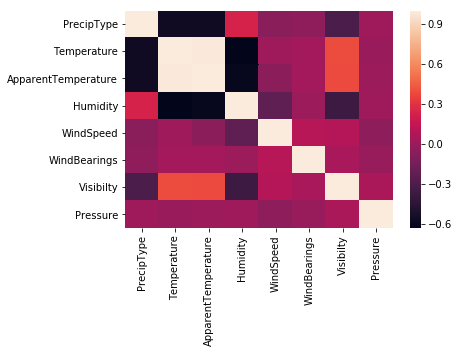

In [383]:
sn.heatmap(df.corr())

In [384]:
df.head()

,Formatted Date,Summary,PrecipType,Temperature,ApparentTemperature,Humidity,WindSpeed,WindBearings,Visibilty,Pressure
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,0,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,0,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,0,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,0,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,0,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51


In [385]:
print(len(df.Summary.unique()))
df.Summary.unique()

27


array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy',
       'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy',
       'Breezy and Overcast', 'Humid and Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy',
       'Dangerously Windy and Partly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast', 'Light Rain', 'Drizzle', 'Windy and Dry',
       'Dry and Mostly Cloudy', 'Breezy and Dry', 'Rain'], dtype=object)

In [386]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
df.Summary[:] = labelencoder_X.fit_transform(df.Summary[:])

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [387]:
df.Summary.unique()

array([19, 17, 18, 12,  3,  6,  5,  4, 13, 15, 23, 25,  2, 26,  0, 11, 24,
        7,  9, 21, 14, 16,  8, 22, 10,  1, 20], dtype=int64)

In [388]:
print(len(df.Summary.unique()))

27


In [389]:
df.head()

,Formatted Date,Summary,PrecipType,Temperature,ApparentTemperature,Humidity,WindSpeed,WindBearings,Visibilty,Pressure
0,2006-04-01 00:00:00.000 +0200,19,0,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13
1,2006-04-01 01:00:00.000 +0200,19,0,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63
2,2006-04-01 02:00:00.000 +0200,17,0,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94
3,2006-04-01 03:00:00.000 +0200,19,0,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41
4,2006-04-01 04:00:00.000 +0200,17,0,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51


In [390]:
# convert series to supervised learning 
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True): 
    n_vars = 1 if type(data) is list else data.shape[1] 
    df = pd.DataFrame(data) 
    cols, names = list(), list() 
    # input sequence (t-n, ... t-1) 
    for i in range(n_in, 0, -1):  
        cols.append(df.shift(i))  
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)] 
    # forecast sequence (t, t+1, ... t+n) 
    for i in range(0, n_out):  
        cols.append(df.shift(-i))  
        if i == 0:   
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]  
        else:   
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)] 
    # put it all together 
    agg = pd.concat(cols, axis=1) 
    agg.columns = names 
    # drop rows with NaN values 
    if dropnan:  
        agg.dropna(inplace=True) 
    return agg 

In [391]:
df = df.set_index(pd.DatetimeIndex(df['Formatted Date']))

In [392]:
df=df.drop('Formatted Date',axis=1)

In [393]:
df.index.name='date'

In [394]:
df.head()

,Summary,PrecipType,Temperature,ApparentTemperature,Humidity,WindSpeed,WindBearings,Visibilty,Pressure
date,,,,,,,,,
2006-03-31 22:00:00,19,0,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13
2006-03-31 23:00:00,19,0,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63
2006-04-01 00:00:00,17,0,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94
2006-04-01 01:00:00,19,0,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41
2006-04-01 02:00:00,17,0,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51


In [395]:
df.to_csv("weather.csv")

In [396]:
data=df.values
print(df.Temperature.min())
df.Temperature.max()

-21.82222222


39.90555556

In [397]:
# ensure all data is float
data=data.astype('float32')

In [398]:
# normalize features
scaler=MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(data)

In [399]:
# specify no. of lag hours
n_hours = 3
n_features = 9

In [400]:
print(scaled[3][2])
print(df.iloc[-1,2])

0.4878049
20.43888889


In [401]:
# frame as supervised learning
reframed = series_to_supervised(scaled,n_hours,1)
print(reframed.shape)

(96450, 36)


In [402]:
print(reframed)

       var1(t-3)  var2(t-3)  var3(t-3)  var4(t-3)  var5(t-3)  var6(t-3)  \
3       0.730769        0.0   0.506975   0.523486       0.89   0.221130   
4       0.730769        0.0   0.505085   0.521084       0.86   0.223399   
5       0.653846        0.0   0.505445   0.553144       0.89   0.061523   
6       0.730769        0.0   0.487805   0.501947       0.83   0.220877   
7       0.653846        0.0   0.495365   0.517356       0.83   0.172970   
8       0.730769        0.0   0.502925   0.519344       0.85   0.218608   
9       0.730769        0.0   0.478805   0.495651       0.95   0.193646   
10      0.730769        0.0   0.495635   0.510645       0.89   0.221634   
11      0.730769        0.0   0.528845   0.574683       0.82   0.177257   
12      0.730769        0.0   0.576636   0.618673       0.72   0.196167   
13      0.730769        0.0   0.612996   0.652142       0.67   0.275088   
14      0.730769        0.0   0.631266   0.668959       0.54   0.309884   
15      0.730769        0

In [403]:
values = reframed.values

In [404]:
n_train_hours=365*24

In [405]:
train = values[:n_train_hours,:]
test = values[n_train_hours:, : ]

In [406]:
# split into input and outputs
n_obs = n_hours * n_features
train_X,train_Y = train[:,:n_obs],train[:,-7]   # as at 7th no. from last is temp. our o/p var
test_X,test_Y = test[:,:n_obs],test[:,-7]

In [407]:
print(test_Y)

[0.5386554  0.53757536 0.5223652  ... 0.7105571  0.70218706 0.68463683]


In [408]:
print(train_X.shape,len(train_X),train_Y.shape)

(8760, 27) 8760 (8760,)


In [409]:
# reshape input to be 3D [samples, timesteps, fetures]
train_X = train_X.reshape((train_X.shape[0],n_hours,n_features))
test_X = test_X.reshape((test_X.shape[0],n_hours,n_features))  # 27 = 3 * 9
print(train_X.shape, train_Y.shape, test_X.shape, test_Y.shape)

(8760, 3, 9) (8760,) (87690, 3, 9) (87690,)


In [410]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae',optimizer='adam')

In [411]:
# fit network
history = model.fit(train_X, train_Y, epochs=50, batch_size=72, validation_data=(test_X, test_Y), verbose=2, shuffle=False)

Train on 8760 samples, validate on 87690 samples
Epoch 1/50
 - 6s - loss: 0.1540 - val_loss: 0.1290
Epoch 2/50
 - 2s - loss: 0.0777 - val_loss: 0.0886
Epoch 3/50
 - 2s - loss: 0.0554 - val_loss: 0.0633
Epoch 4/50
 - 2s - loss: 0.0435 - val_loss: 0.0495
Epoch 5/50
 - 2s - loss: 0.0407 - val_loss: 0.0474
Epoch 6/50
 - 2s - loss: 0.0396 - val_loss: 0.0454
Epoch 7/50
 - 2s - loss: 0.0378 - val_loss: 0.0412
Epoch 8/50
 - 2s - loss: 0.0363 - val_loss: 0.0390
Epoch 9/50
 - 2s - loss: 0.0354 - val_loss: 0.0378
Epoch 10/50
 - 2s - loss: 0.0345 - val_loss: 0.0367
Epoch 11/50
 - 2s - loss: 0.0337 - val_loss: 0.0357
Epoch 12/50
 - 2s - loss: 0.0327 - val_loss: 0.0347
Epoch 13/50
 - 2s - loss: 0.0318 - val_loss: 0.0330
Epoch 14/50
 - 2s - loss: 0.0312 - val_loss: 0.0327
Epoch 15/50
 - 2s - loss: 0.0308 - val_loss: 0.0319
Epoch 16/50
 - 2s - loss: 0.0302 - val_loss: 0.0317
Epoch 17/50
 - 2s - loss: 0.0297 - val_loss: 0.0309
Epoch 18/50
 - 2s - loss: 0.0290 - val_loss: 0.0298
Epoch 19/50
 - 2s - loss

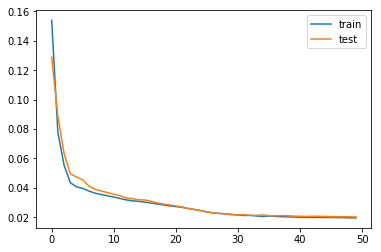

In [412]:
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [413]:
# make a prediction
test_Y_predicted = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_hours*n_features))

In [414]:
print(test_Y_predicted)
print(test_Y)

[[0.46693447]
 [0.54614013]
 [0.54067385]
 ...
 [0.72517693]
 [0.6847001 ]
 [0.6831902 ]]
[0.5386554  0.53757536 0.5223652  ... 0.7105571  0.70218706 0.68463683]


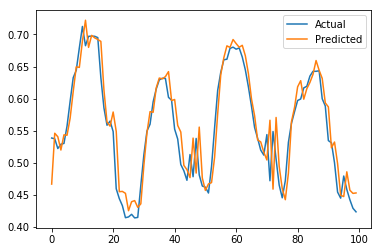

In [415]:
pyplot.plot(test_Y[:100],label="Actual")
pyplot.plot(test_Y_predicted[:100],label="Predicted")
pyplot.legend()

In [416]:
# invert scaling for forecast
vir_array= np.concatenate((test_X[:,-9:-7],test_Y_predicted),axis=1)
inv_test_Y_predicted = np.concatenate((vir_array,test_X[:,-6:]),axis=1)
inv_test_Y_predicted = scaler.inverse_transform(inv_test_Y_predicted)
inv_test_Y_predicted = inv_test_Y_predicted[:,2]
print(inv_test_Y_predicted)

[ 7.0006037 11.889793  11.552372  ... 22.941336  20.44279   20.34959  ]


In [417]:
# invert scaling for actual
test_Y = test_Y.reshape((len(test_Y), 1))
vir_array2= np.concatenate((test_X[:,-9:-7],test_Y),axis=1)
inv_test_Y = np.concatenate((vir_array2,test_X[:,-6:]),axis=1)
inv_test_Y = scaler.inverse_transform(inv_test_Y)
inv_test_Y = inv_test_Y[:,2]
print(inv_test_Y)

[11.427777 11.361109 10.42222  ... 22.038887 21.522223 20.438887]


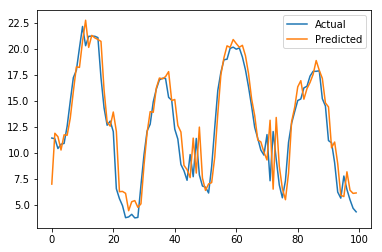

In [418]:
pyplot.plot(inv_test_Y[:100],label="Actual")
pyplot.plot(inv_test_Y_predicted[:100],label="Predicted")
pyplot.legend()

In [419]:
# calculate RMSE
from math import sqrt
rmse = sqrt(mean_squared_error(inv_test_Y, inv_test_Y_predicted))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1.666


In [420]:
# comparing actual temperature and predicted temperature predicted using data of 3 previous hours
df_result=pd.DataFrame({'Actual_Temperature':inv_test_Y,'Predicted_Temperature':inv_test_Y_predicted})

In [421]:
df_result.head()

,Actual_Temperature,Predicted_Temperature
0,11.427777,7.000604
1,11.361109,11.889793
2,10.422220,11.552372
3,10.833334,10.277003
4,10.911113,11.737990
